In [1]:
import nglview
from openff.toolkit import ForceField, Molecule, Topology
from openff.units import unit
from gemmi import cif
from gemmi import read_small_structure
import numpy as np
from openff.interchange import Interchange
from openff.interchange.components._packmol import UNIT_CUBE, pack_box
from openff.interchange.drivers import get_summary_data
from openff.units import unit, Quantity
from rdkit.Chem import rdDetermineBonds
from rdkit.Chem import Draw

from pymatgen.io.cif import CifParser
import pycodcif

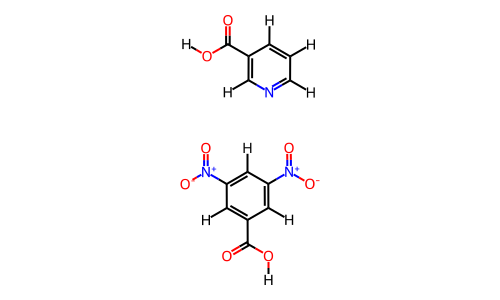

In [9]:
#out = pycodcif.parse("../../inputs/small_molecule/AWUDEB.sdf")
#print(out)

sdf_path = Molecule.from_file("../../openpharmmdflow/tests/io/data/AWUDEB.sdf")
#sdf_path = Molecule.from_file("../../openpharmmdflow/tests/io/data/HXACAN.sdf")
sdf_path.visualize()

In [2]:
molecules = [
    Molecule.from_smiles(smi)
    for smi in ["ClC(Cl)(Cl)Cl", "CC1=CC=CC=C1", "CS(=O)C", "CCCCCCO"]
]


from openff.toolkit import Molecule, Topology


topology = Topology()
#topology.add_molecule(molecule)

by_hand = Molecule()
by_hand.name = "Zwitterionic l-Alanine"

by_hand.add_atom(
    atomic_number=8,  # Atomic number 8 is Oxygenvisualize
    formal_charge=-1,  # Formal negative charge
    is_aromatic=False,  # Atom is not part of an aromatic system
    stereochemistry=None,  # Optional argument; "R" or "S" stereochemistry
    name="O-",  # Optional argument; descriptive name for the atom
)
by_hand.add_atom(6, 0, False, name="C")
by_hand.add_atom(8, 0, False, name="O")
by_hand.add_atom(6, 0, False, stereochemistry="S", name="CA")
by_hand.add_atom(1, 0, False, name="CAH")
by_hand.add_atom(6, 0, False, name="CB")
by_hand.add_atom(1, 0, False, name="HB1")
by_hand.add_atom(1, 0, False, name="HB2")
by_hand.add_atom(1, 0, False, name="HB3")
by_hand.add_atom(7, +1, False, name="N+")
by_hand.add_atom(1, 0, False, name="HN1")
by_hand.add_atom(1, 0, False, name="HN2")
by_hand.add_atom(1, 0, False, name="HN3")


by_hand.add_bond(
    atom1=0,  # First (zero-indexed) atom specified above ("O-")
    atom2=1,  # Second atom specified above ("C")
    bond_order=1,  # Single bond
    is_aromatic=False,  # Bond is not aromatic
    stereochemistry=None,  # Optional argument; "E" or "Z" stereochemistry
    fractional_bond_order=None,  # Optional argument; Wiberg (or similar) bond order
)
by_hand.add_bond(1, 2, 2, False)  # C = O
by_hand.add_bond(1, 3, 1, False)  # C - CA
by_hand.add_bond(3, 4, 1, False)  # CA - CAH
by_hand.add_bond(3, 5, 1, False)  # CA - CB
by_hand.add_bond(5, 6, 1, False)  # CB - HB1
by_hand.add_bond(5, 7, 1, False)  # CB - HB2
by_hand.add_bond(5, 8, 1, False)  # CB - HB3
#by_hand.add_bond(3, 9, 1, False)  # CB - N+
by_hand.add_bond(9, 10, 1, False)  # N+ - HN1
by_hand.add_bond(9, 11, 1, False)  # N+ - HN2
by_hand.add_bond(9, 12, 1, False)  # N+ - HN3


by_hand.visualize()

doc = cif.read_file("../../inputs/small_molecule/AWUDEB.cif")
doc = cif.read_file("../../inputs/small_molecule/HXACAN.cif")


block = doc.sole_block()
block.name

atom_site_fract_x = block.find_values("_atom_site_fract_x")
atom_site_fract_y = block.find_values("_atom_site_fract_y")
atom_site_fract_z = block.find_values("_atom_site_fract_z")
atom_site_type_symbol = block.find_values("_atom_site_type_symbol")
atom_site_label = block.find_values("_atom_site_label")
atom_bond_1 = block.find_values("_geom_bond_atom_site_label_1")
atom_bond_2 = block.find_values("_geom_bond_atom_site_label_2")

atom_site_lists = [atom_site_fract_x, atom_site_fract_y, atom_site_fract_z, atom_site_type_symbol, atom_site_label]

assert all(len(lst) == len(atom_site_lists[0]) for lst in atom_site_lists)

from openff.units.elements import SYMBOLS
NUMBERS: dict[str, int] = {val: key for key, val in SYMBOLS.items()}


from_ciff = Molecule()
name_to_idx = {}
for idx, (atom_symbol, atom_name) in enumerate(zip(atom_site_type_symbol, atom_site_label)):
    from_ciff.add_atom(atomic_number=NUMBERS[atom_symbol], name=atom_name, formal_charge=0, is_aromatic=False)
    name_to_idx[atom_name] = idx

for atom_1_name, atom_2_name in zip(atom_bond_1, atom_bond_2):
    print(atom_1_name, atom_2_name)
    atom1_idx, atom2_idx, = name_to_idx[atom_1_name], name_to_idx[atom_2_name]
    from_ciff.add_bond(atom1=atom1_idx, atom2=atom2_idx, bond_order=1, is_aromatic=False)
    
xyz = np.transpose(np.array([float(atom_site_fract_x, atom_site_fract_y, atom_site_fract_z]))
print(xyz)
from_ciff.add_conformer(np.transpose(np.array([atom_site_fract_x, atom_site_fract_y, atom_site_fract_z]))*unit.nm)
from_ciff.visualize()
from_ciff.to_file("test.xyz", file_format="xyz")

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (3453151554.py, line 94)

In [ ]:
small_mol = read_small_structure("../../inputs/small_molecule/HXACAN.cif")
small_mol = read_small_structure("../../inputs/small_molecule/AWUDEB.cif")

small_mol.sites[0].occ
small_mol.connections[0]


In [3]:
# First we need to figure out if we are using 

In [4]:
parser = CifParser("../../test_reader/molecular.cif")
structure = parser.parse_structures()[0]

structure.cart_coords * unit.angstrom


#parser = CifParser("../../test_reader/unitcell.cif")
#structure_cell = parser.parse_structures()[0]

#print(structure_mol, structure_cell)

/home/mmh/micromamba/envs/openpharmmdflow-mini/lib/python3.12/site-packages/pymatgen/io/cif.py:1191: UserWarning: The default value of primitive was changed from True to False in https://github.com/materialsproject/pymatgen/pull/3419. CifParser now returns the cell in the CIF file as is. If you want the primitive cell, please set primitive=True explicitly.
  warnings.warn(


Magnitude,[[3.748914280570887 3.0362523215403794 8.187084125435643] [1.3964713601992624 4.281378458161884 4.977819568592588] [0.7651552205889014 0.6277472796930234 1.352693635251421] [4.380230420181248 6.689883500009239 11.81221005877681] [0.3859631304223973 1.57348706236132 8.039584003610413] [4.759422510347752 5.744143717340943 5.12531969041782] [4.964812990035568 3.262985161924122 10.349380323761821] [0.18057265073458123 4.0546456177781405 2.8155233702664093] [2.0249257715411955 0.7496158812940997 3.468547882476899] [3.120459869228954 6.568014898408164 9.696355811551332] [0.6803819052426866 2.0804914657465763 4.6861204925660065] [4.465003735527463 5.237139313955687 8.478783201462225] [5.209801181366201 1.6428364775706388 6.983722844634088] [-0.06441554059605109 5.674794302131624 6.181180849394144] [0.6530022161332 0.4165596804537164 5.300960587666406] [4.49238342463695 6.901071099248546 7.863943106361825] [3.6398263411004614 2.0337052684080192 4.63618985938553] [1.5055592996696885 5.283925511294244 8.528713834642701] [2.178625769764928 1.8182224635781319 9.011655832056578] [2.9667598710052214 5.499408316124131 4.1532478619716535] [3.3824365578302946 2.530239793736788 9.076136807563442] [1.7629490829398549 4.787390985965475 4.088766886464789] [1.6994622908253465 1.1888648397122568 1.393401593832341] [3.445923349944803 6.128765939990006 11.77150210019589] [4.071503056277141 2.639639178832723 10.286079219476367] [1.073882584493008 4.67799160086954 2.878824474551863] [2.393857420408962 1.2746000803630697 2.591506761033845] [2.7515282203611875 6.043030699339194 10.573396932994386] [1.7243111803592799 1.7613696335448343 6.542885196484497] [3.4210744604108703 5.5562611461574285 6.622018497543734] [3.57148623017986 2.0296382631333043 2.675364129338866] [1.5738994105902893 5.287992516568958 10.489539564689364] [0.5888330694851387 1.476219410493072 5.593808916899009] [4.556552571285011 5.841411369209191 7.571094777129222] [1.3743953634621908 1.7321320456186386 7.852505481077659] [3.770990277307958 5.585498734083624 5.312398212950572] [2.899149040271548 1.9575116658128144 6.154930806793944] [2.2462366004986016 5.360119113889449 7.009972887234287] [4.244790443691545 2.1904747077718723 3.849990347944301] [0.900595197078605 5.12715607193039 9.31491334608393]]
Units,angstrom


In [12]:
file = "../../inputs/small_molecule/HXACAN.cif"
file = "../../inputs/small_molecule/AWUDEB.cif"
#file = "../../test_reader/molecular.cif"
parser = CifParser(file)
structures = parser.parse_structures()[0]
print(len(structures))
print(structures)
print(dir(structures))



#from_ciff = Molecule()
#for i, atom in enumerate(structure):
#    atom_symbol = atom.species_string
    #print(i, atom_symbol)
#    name = f"{atom_symbol}{i}"
#    from_ciff.add_atom(atomic_number=NUMBERS[atom_symbol], name=name, formal_charge=0, is_aromatic=False)
print(structure.cart_coords)
xyz = structure.cart_coords * unit.angstrom


from_ciff.add_conformer(xyz)
#from_ciff.to_file("test.xyz", file_format="xyz")
rdkit_mol = from_ciff.to_rdkit()
rdkit_mol
rdDetermineBonds.DetermineBonds(rdkit_mol,charge=0)

rdkit_mol
#from_ciff.visualize()

132
Full Formula (H36 C52 N12 O32)
Reduced Formula: H9C13N3O8
abc   :  14.053000   5.046000  20.105000
angles:  90.000000 103.573000  90.000000
pbc   :       True       True       True
Sites (132)
  #  SP          a       b        c
---  ----  -------  ------  -------
  0  H     0.2385   0.1107  0.2936
  1  H     0.2615   0.6107  0.2064
  2  H     0.7615   0.8893  0.7064
  3  H     0.7385   0.3893  0.7936
  4  H     0.0969   0.3542  0.2787
  5  H     0.4031   0.8542  0.2213
  6  H     0.9031   0.6458  0.7213
  7  H     0.5969   0.1458  0.7787
  8  H     0.0878   0.6883  0.3543
  9  H     0.4122   0.1883  0.1457
 10  H     0.9122   0.3117  0.6457
 11  H     0.5878   0.8117  0.8543
 12  H     0.3572   0.5549  0.4551
 13  H     0.1428   0.0549  0.0449
 14  H     0.6428   0.4451  0.5449
 15  H     0.8572   0.9451  0.9551
 16  H     0.1243   0.3625  0.5468
 17  H     0.3757   0.8625  0.9532
 18  H     0.8757   0.6375  0.4532
 19  H     0.6243   0.1375  0.0468
 20  H     0.2487   0.8585  0.6

InvalidConformerError: molecule.add_conformer given input of the wrong shape: Given (132, 3), expected (0, 3)

In [50]:
structure_cell[0].label, structure_cell[0].structure_cell[0].labe

('H1_0', Composition('H1'))

In [82]:
print([_.species.elements for _ in structure_cell])
structure_cell[0].species.as_dict()

[[Element H], [Element H], [Element H], [Element H], [Element H], [Element H], [Element H], [Element H], [Element H], [Element H], [Element H], [Element H], [Element H], [Element H], [Element H], [Element H], [Element H], [Element H], [Element C], [Element C], [Element C], [Element C], [Element C], [Element C], [Element C], [Element C], [Element C], [Element C], [Element C], [Element C], [Element C], [Element C], [Element C], [Element C], [Element N], [Element N], [Element O], [Element O], [Element O], [Element O]]


{'H': 1.0}

In [89]:
from rdkit import Chem
from rdkit.Chem import AllChem
from io import StringIO

def parse_xyz_string(xyz_string):
    mol_block = f"{len(xyz_string.splitlines())}\n\n{xyz_string}"
    print(xyz_string)
    
    # Read the molecule block
    mol_supplier = Chem.MolFromMolBlock(xyz_string)
    
    # Compute 3D coordinates if not already present
    #AllChem.Compute2DCoords(mol_supplier)
    AllChem.Compute3DCoords(mol_supplier)
    
    return mol_supplier

# Example XYZ-formatted string
xyz_string = """3
O  0.000  0.000  0.000
H  0.757  0.586  0.000
H -0.757  0.586  0.000
"""

# Parse XYZ string using RDKit
mol = parse_xyz_string(xyz_string)

# Output mol object (you can visualize or manipulate it further)
print(mol)

3
O  0.000  0.000  0.000
H  0.757  0.586  0.000
H -0.757  0.586  0.000



[12:04:16] Cannot convert 'H -' to unsigned int on line 4


ArgumentError: Python argument types in
    rdkit.Chem.rdDepictor.Compute2DCoords(NoneType)
did not match C++ signature:
    Compute2DCoords(RDKit::ROMol {lvalue} mol, bool canonOrient=True, bool clearConfs=True, boost::python::dict {lvalue} coordMap={}, unsigned int nFlipsPerSample=0, unsigned int nSample=0, int sampleSeed=0, bool permuteDeg4Nodes=False, double bondLength=-1.0, bool forceRDKit=False, bool useRingTemplates=False)

In [3]:
topology = pack_box(
    molecules=molecules,
    number_of_copies=4 * [200],
    mass_density=850 * unit.kilogram / unit.meter**3,
    box_shape=UNIT_CUBE,
)

In [4]:
topology.to_file("system.pdb")
nglview.show_structure_file("system.pdb")

NGLWidget()

In [5]:
force_field = ForceField("openff_unconstrained-2.1.0.offxml")
interchange = Interchange.from_smirnoff(force_field=force_field, topology=topology)

In [6]:
interchange.visualize("nglview")

NGLWidget()

In [7]:
get_summary_data(interchange, _engines=["OpenMM", "GROMACS", "Amber"])

,Bond,Angle,Torsion,Electrostatics,vdW
OpenMM,7294.737428,23614.974229,6413.856957,-18759.309105,137408.193219
Amber,7294.736219,23614.974650,6413.856942,273049.698114,141648.815410


In [11]:
import time

import openmm

# Length of the simulation.
num_steps = 1000  # number of integration steps to run

# Logging options.
trj_freq = 10  # number of steps per written trajectory frame
data_freq = 10  # number of steps per written simulation statistics

# Integration options
time_step = 2 * openmm.unit.femtoseconds  # simulation timestep
temperature = 300 * openmm.unit.kelvin  # simulation temperature
friction = 1 / openmm.unit.picosecond  # friction constant

integrator = openmm.LangevinIntegrator(temperature, friction, time_step)

In [12]:
simulation = interchange.to_openmm_simulation(integrator=integrator)

simulation.context.setVelocitiesToTemperature(temperature)

pdb_reporter = openmm.app.PDBReporter("trajectory.pdb", trj_freq)
state_data_reporter = openmm.app.StateDataReporter(
    "data.csv",
    data_freq,
    step=True,
    potentialEnergy=True,
    temperature=True,
    density=True,
)
simulation.reporters.append(pdb_reporter)
simulation.reporters.append(state_data_reporter)

In [13]:
print("Starting simulation")
start = time.process_time()

# Run the simulation
simulation.step(num_steps)

end = time.process_time()
print(f"Elapsed time {end - start} seconds")
print("Done!")

Starting simulation
Elapsed time 9.043640955 seconds
Done!


In [17]:
nglview.show_mdtraj(md.load("trajectory.pdb"))

NGLWidget(max_frame=99)